In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import MultipleLocator

In [2]:
df = pd.read_csv('hh_ru_dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 26 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   topic_id                 500000 non-null  object 
 1   topic_creation_date      500000 non-null  object 
 2   initial_state            499166 non-null  object 
 3   final_state              499166 non-null  object 
 4   resume_id                500000 non-null  object 
 5   resume_creation_date     500000 non-null  object 
 6   profession               500000 non-null  object 
 7   gender                   500000 non-null  object 
 8   year_of_birth            500000 non-null  int64  
 9   resume_region            500000 non-null  object 
 10  education_level          499898 non-null  object 
 11  expected_salary          489214 non-null  float64
 12  relocation_status        500000 non-null  object 
 13  business_trip_readiness  500000 non-null  object 
 14  work

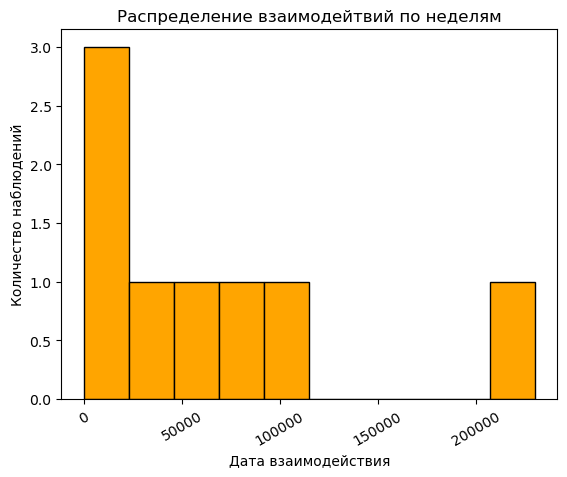

In [3]:
plt.hist(df.education_level.value_counts(), color='orange', edgecolor='black')
plt.xticks(rotation=30)
plt.xlabel('Дата взаимодействия')
plt.ylabel('Количество наблюдений')
plt.title('Распределение взаимодейтвий по неделям')
# plt.savefig('img/topic_date.png', bbox_inches='tight')
plt.show()

/tmp/ipykernel_18929/3695617028.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(d, ignore_index=True)
/tmp/ipykernel_18929/3695617028.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(d, ignore_index=True)
/tmp/ipykernel_18929/3695617028.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(d, ignore_index=True)
/tmp/ipykernel_18929/3695617028.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append({'invitation': result.invitation.sum(),


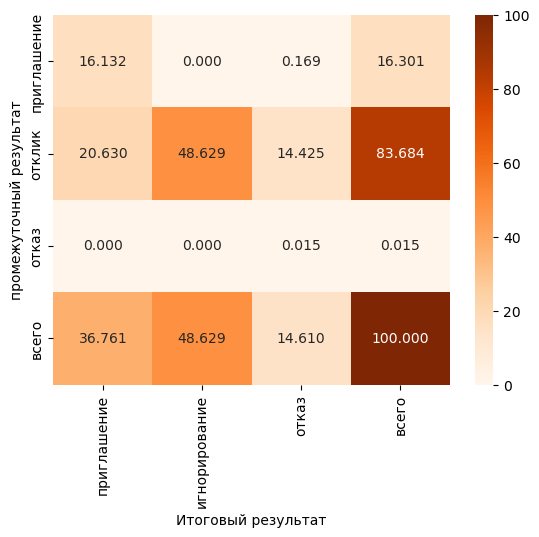

In [4]:
result = pd.DataFrame(columns=['invitation', 'response', 'discard']) # columns - final_state
for i in ['invitation', 'response', 'discard']:
    d = dict()
    for j in result.columns:
        d[j] = ((df.initial_state == i) & (df.final_state==j)).sum() / 4991.66
    result = result.append(d, ignore_index=True)
result = result.append({'invitation': result.invitation.sum(), 
               'response' : result.response.sum(), 
               'discard':result.discard.sum()}, ignore_index=True)
result['total']=result.apply(lambda x: x['response']+x['invitation']+x['discard'], 1)
result.index=['приглашение', 'отклик', 'отказ', 'всего']
result.index.name = 'промежуточный результат'
result.columns = ['приглашение', 'игнорирование', 'отказ', 'всего']
result.columns.name='Итоговый результат'
ax = sns.heatmap(result, annot=True, fmt='.3f', cmap='Oranges')
fig = ax.get_figure()
# fig.savefig('img/states_table.png')

In [5]:
temp = df.groupby('education_level').resume_id.nunique()
temp.index = temp.index.map(lambda x:translate.get(x, 'Нет данных'))
temp

NameError: name 'translate' is not defined

In [ ]:
translate = {'secondary': 'Среднее общее',
            'special_secondary': 'Среднее профессиональное',
            'unfinished_higher':'Неоконченное высшее',
            'bachelor':'Бакалавриат',
            'higher':'Высшее',
            'master':'Магистратура',
            'candidate':'Кандидат наук',
            'doctor': 'Доктор наук'}
ax=temp.plot(kind='bar', color = 'orange')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Уровень образования')
plt.ylabel('Количество человек(логарифмированно)')
plt.title('Распределение людей по уровням образования')
ax.set_yscale('log')
plt.show()
ax.get_figure().savefig('img/education_level_bar.png', bbox_inches='tight')

In [ ]:
temp = df[~df.expected_salary.isna()].groupby('expected_salary').resume_id.nunique()
temp

In [7]:
cor = df.copy()
cor = cor[['final_state', 'gender', 'expected_salary', 'work_experience_months', 'compensation_to', 'year_of_birth']]
cor['final_state'] = cor['final_state'].map(lambda x: 1 if x=='invitation' else 0)
cor['gender'] = cor['gender'].map(lambda x: 0 if x=='male' else 1)

In [8]:
cor = cor.set_axis(['Результат взаимодействия', 'Пол', 'Ожидаемая зп', 'Опыт работы(в месяцах)', 
              'Ограничение по зп', 'Год рождения'], axis=1)

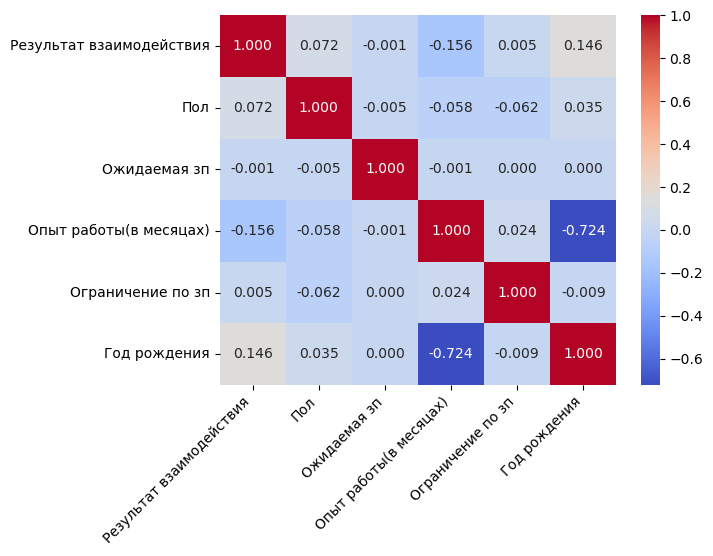

In [9]:
showed = cor.corr()
sns.heatmap(showed, annot=True, cmap = 'coolwarm', fmt='.3f')
plt.xticks(rotation=45,ha='right')
plt.savefig('img/correlation_oranges.png', bbox_inches='tight')

In [172]:
cor

,final_state,gender,expected_salary,work_experience_months,compensation_to
0,0,1,65000.0,68,180000.0
1,1,0,80000.0,115,110000.0
2,1,0,60000.0,52,50000.0
3,0,1,150000.0,141,250000.0
4,1,1,70000.0,42,275000.0
...,...,...,...,...,...
499995,0,0,120000.0,133,150000.0
499996,0,0,80000.0,90,90000.0
499997,0,1,50000.0,179,145000.0
499998,0,0,20000.0,0,NaN
